In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset 1 - Customer Segmentation Classification
('https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?resource=download')

## Description

1) Source of data
  ('https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?resource=download')

2) Brief description of data

  Data for an automobile company. Data is describing attriibutes of a portion of their existing customer base and classifying them into segments. Marketing and sales will then reach out in a variety of ways in order to connect with each segment.

3) What is the target?

  Segmentation

4) Is this a classification or regression problem?

  Classification

5) How many features?

11

6) How many rows of data.

2627

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

This should be a fairly straightforward dataset in terms of exploring and modeling. The only issue I foresee will be in cleaning the data, more specifically dealing with missing data.



## Cleaning

In [75]:
df = pd.read_csv('/content/drive/MyDrive/08 Week 8: Gradient Boosting Algorithms/Auto_Train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [76]:
df.shape

(8068, 11)

In [77]:
# Checking for duplicated data
df.duplicated().sum()

0

In [78]:
# Checking for missing data
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Ever_Married - New Category 'NA'

Graduated - New Category 'NA'

Profession - New Category 'NA'

Work_Experience - SimpleImputerr(strategy='mean)

Family_Size - SimpleImputerr(strategy='mean)

Var_1 - New Category 'NA'

In [79]:
# Address Missing - Categorical
df['Ever_Married'].fillna('Missing', inplace=True)
df['Graduated'].fillna('Missing', inplace=True)
df['Profession'].fillna('Missing', inplace=True)
df['Var_1'].fillna('Missing', inplace=True)

In [80]:
# Address Missing - Numerical 
mean_work = df['Work_Experience'].mean()
df['Work_Experience'].fillna(mean_work, inplace=True)

mean_family = df['Family_Size'].mean()
df['Family_Size'].fillna(mean_family, inplace=True)

In [81]:
# Check Missing
df.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [82]:
# Check Value Counts
df['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [83]:
df['Ever_Married'].value_counts()

Yes        4643
No         3285
Missing     140
Name: Ever_Married, dtype: int64

In [84]:
df['Age'].value_counts()

35    250
37    234
33    232
42    232
40    229
     ... 
78     29
87     28
76     27
80     24
85     22
Name: Age, Length: 67, dtype: int64

In [85]:
df['Graduated'].value_counts()

Yes        4968
No         3022
Missing      78
Name: Graduated, dtype: int64

In [86]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Missing           124
Name: Profession, dtype: int64

In [87]:
df['Work_Experience'].value_counts()

1.000000     2354
0.000000     2318
2.641663      829
9.000000      474
8.000000      463
2.000000      286
3.000000      255
4.000000      253
6.000000      204
7.000000      196
5.000000      194
10.000000      53
11.000000      50
12.000000      48
13.000000      46
14.000000      45
Name: Work_Experience, dtype: int64

## Exploratory Viz - Univariate

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


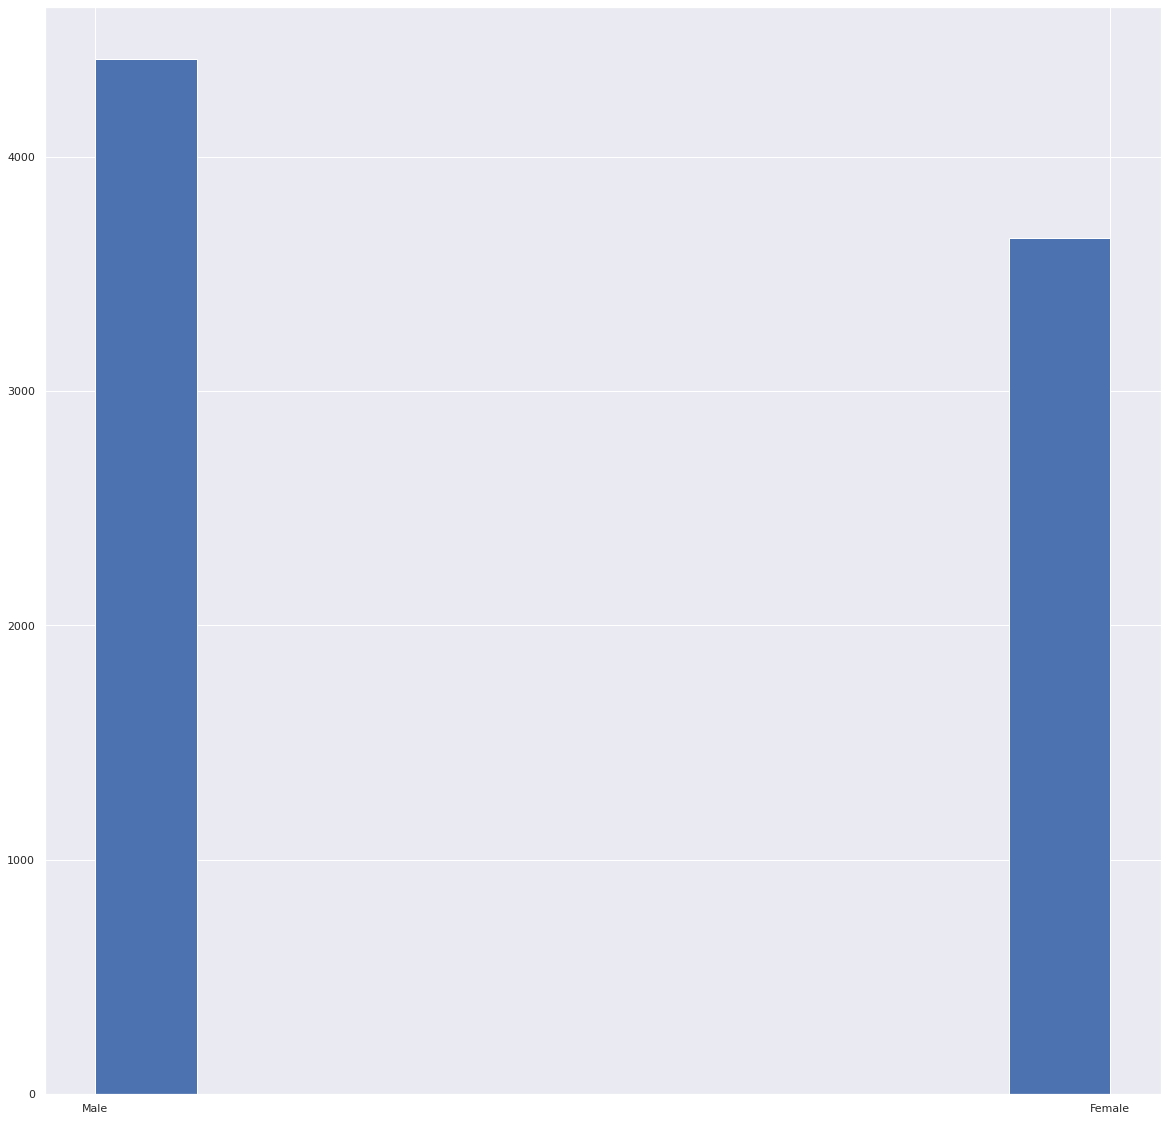

In [89]:
df['Gender'].hist()

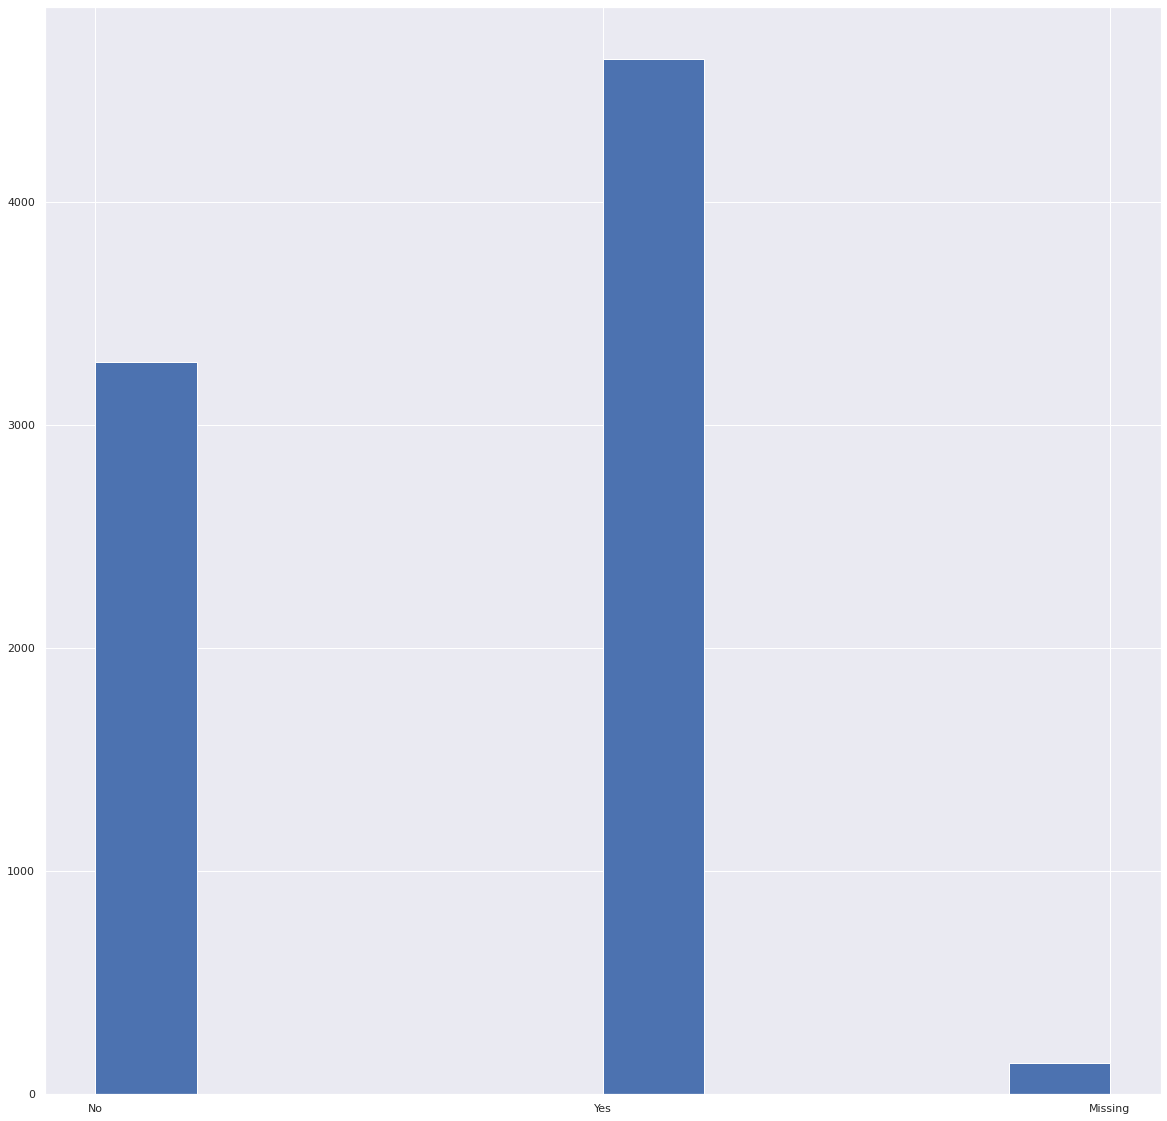

In [90]:
df['Ever_Married'].hist()

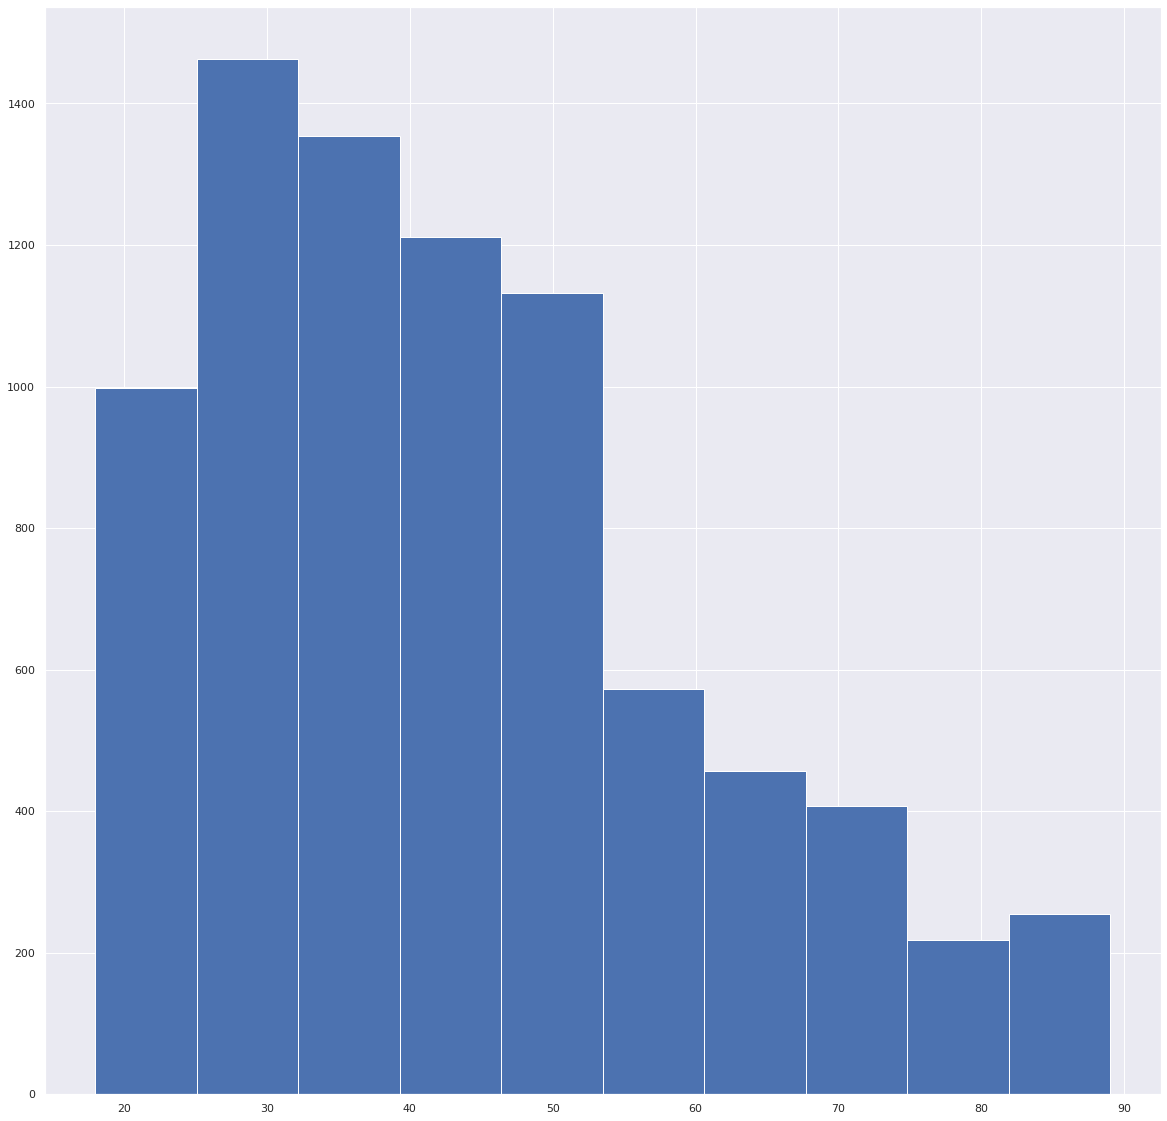

In [91]:
df['Age'].hist()

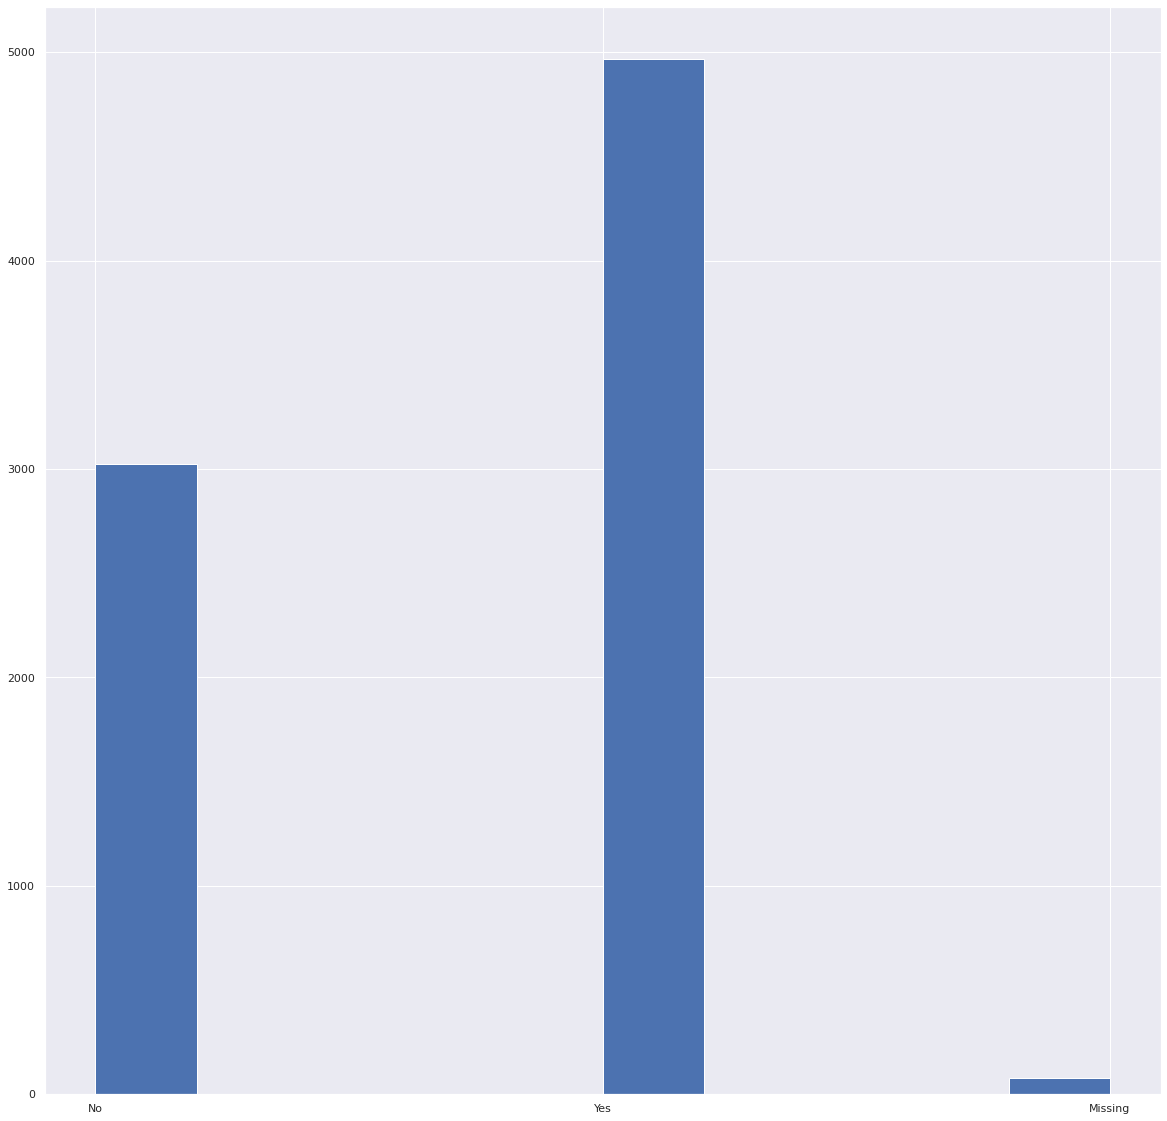

In [92]:
df['Graduated'].hist()

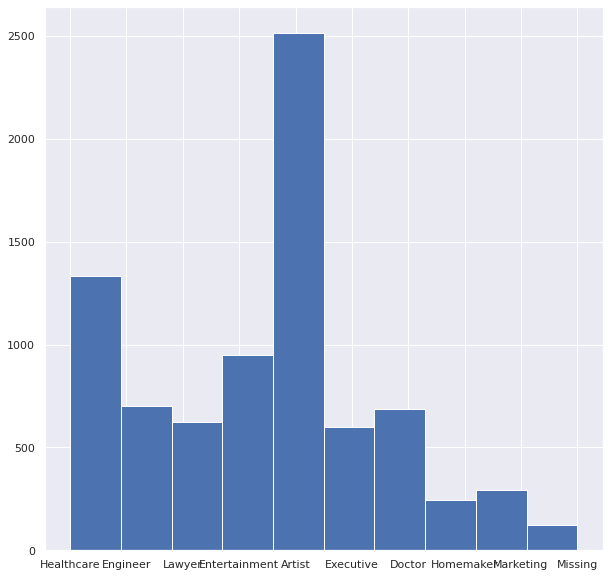

In [93]:
df['Profession'].hist(figsize=(10,10))

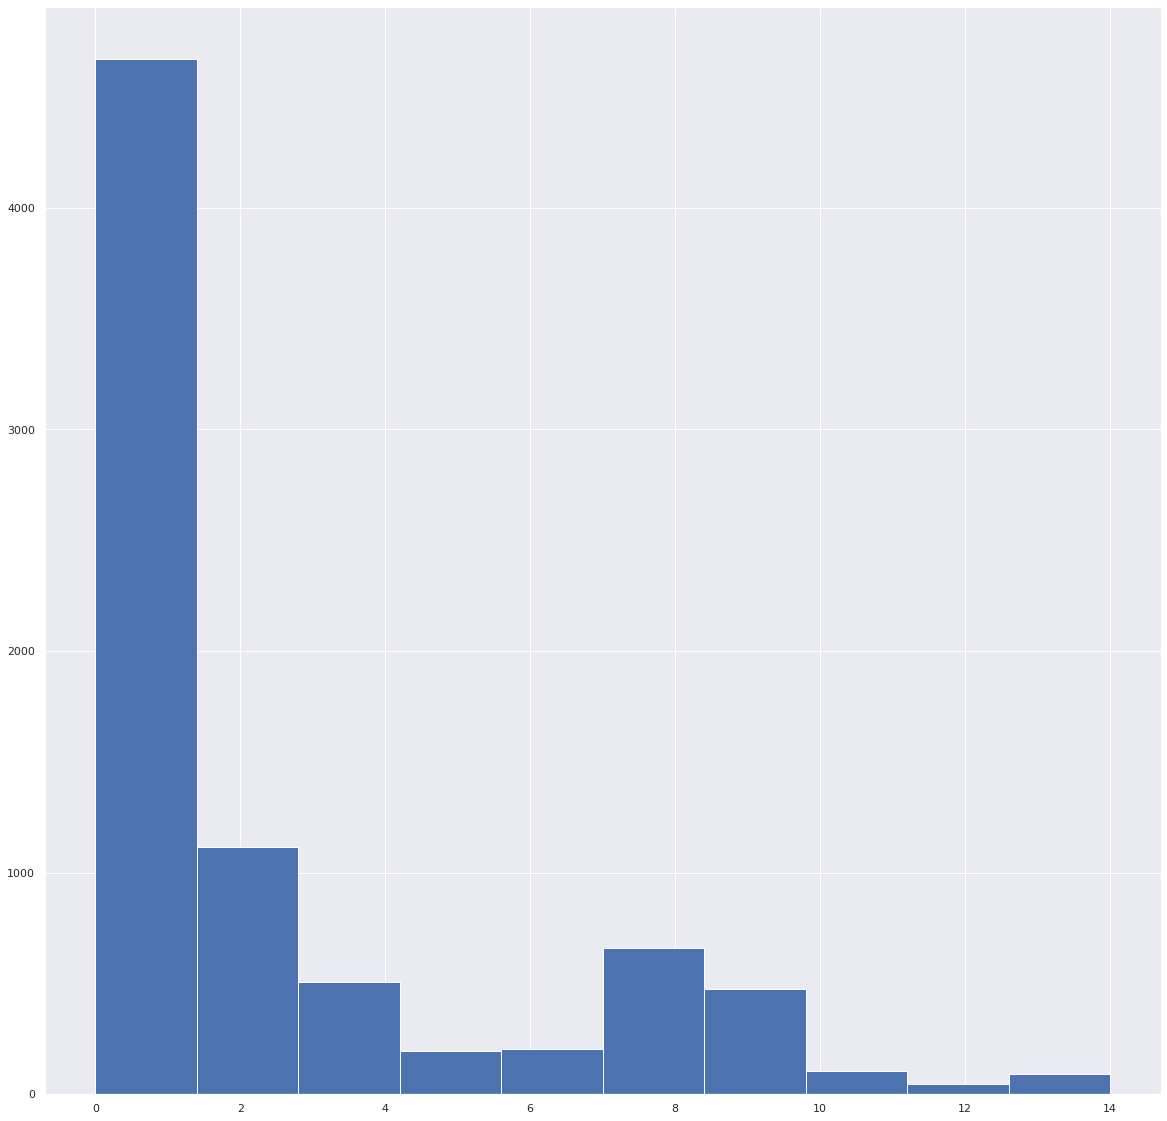

In [94]:
df['Work_Experience'].hist()

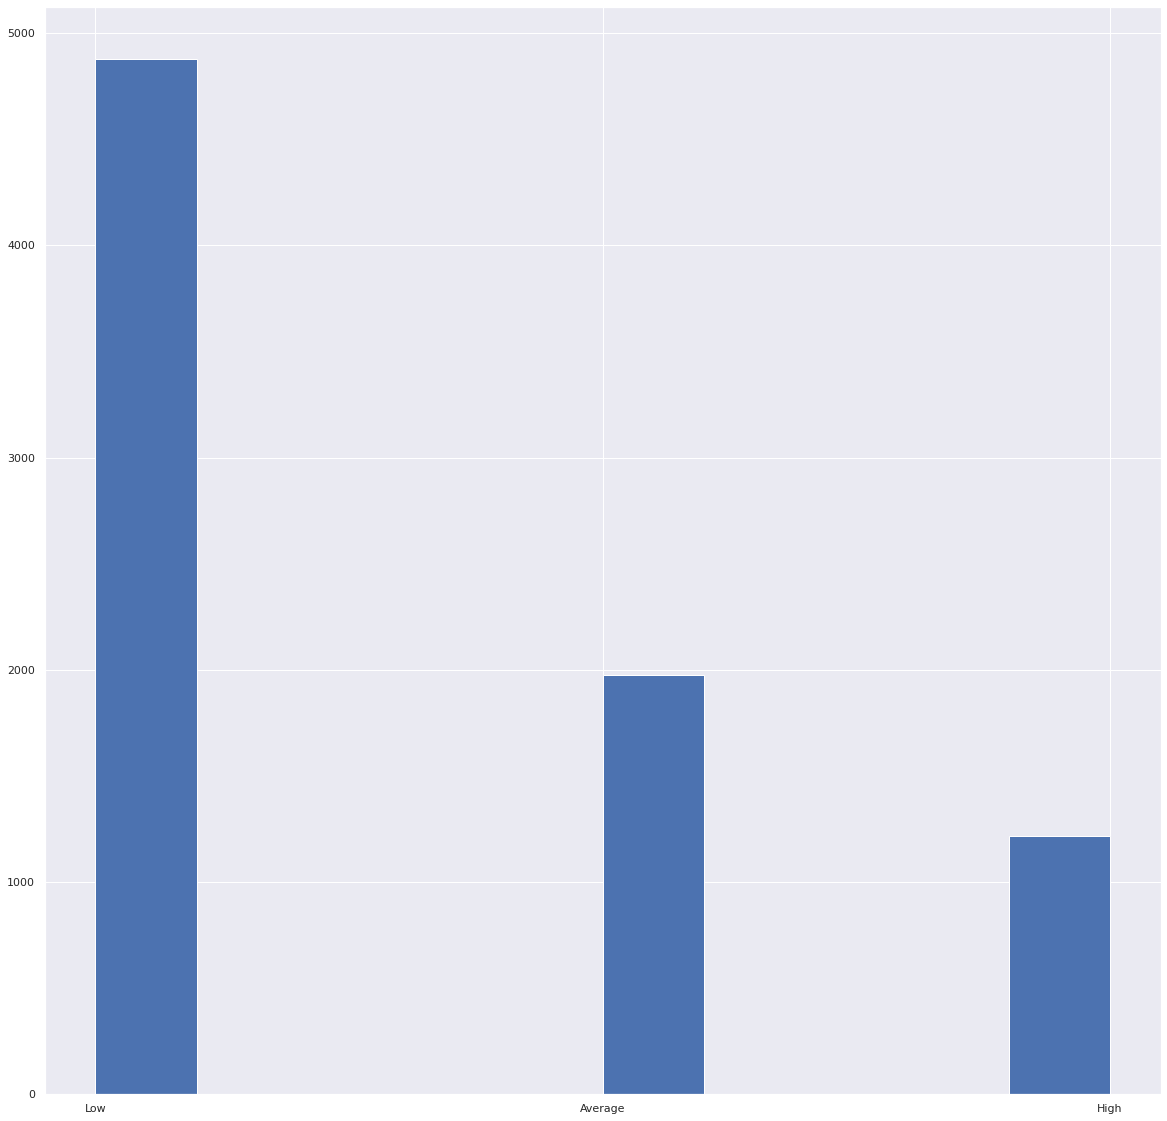

In [95]:
df['Spending_Score'].hist()

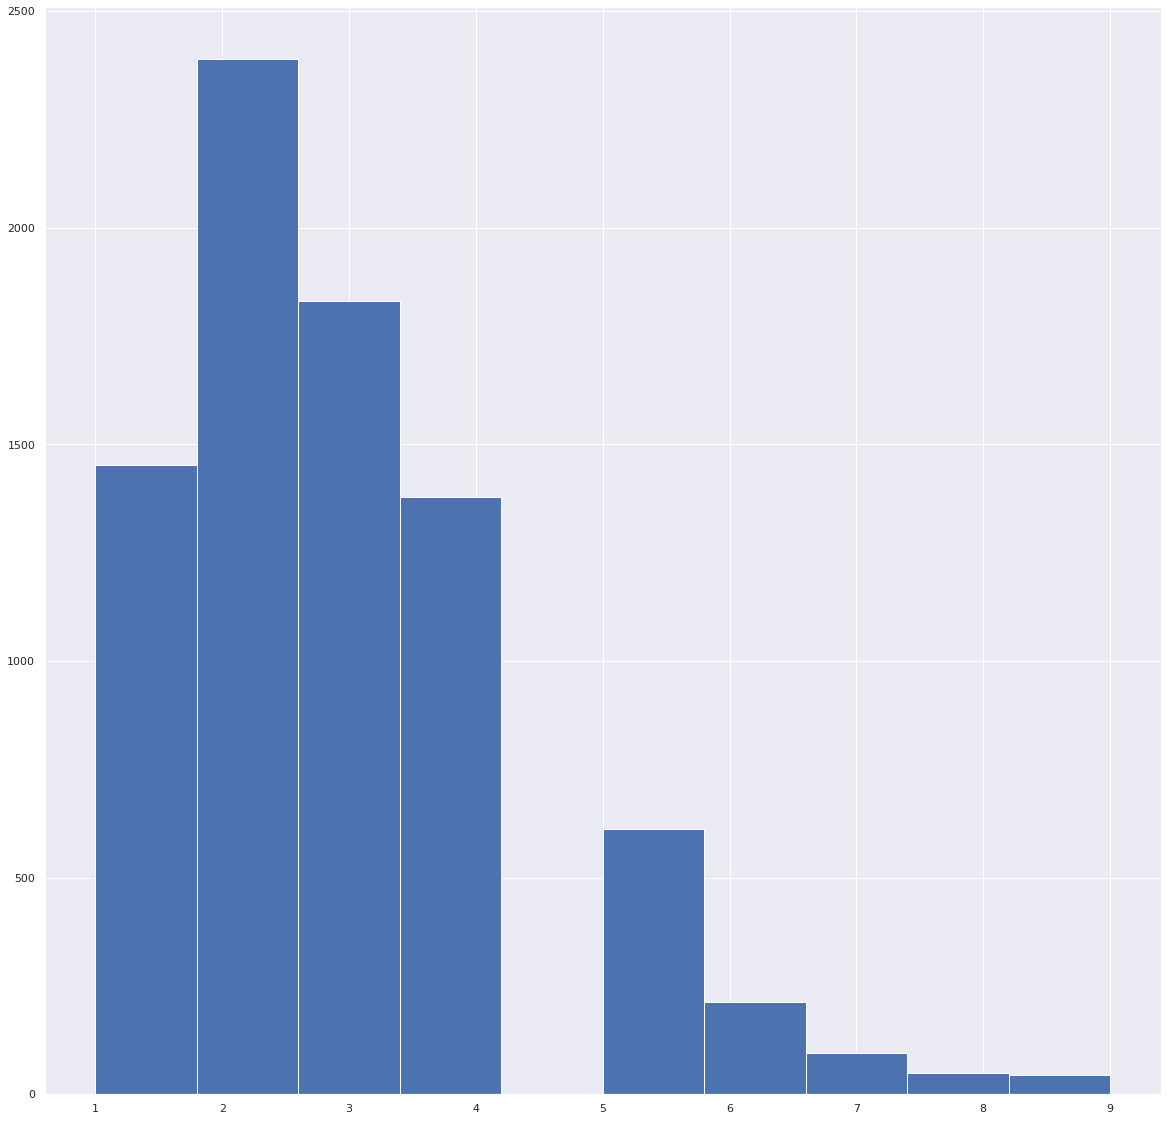

In [96]:
df['Family_Size'].hist()

## Exploratory viz - Multivariate

In [97]:
# Find Strong Correlations
corr = df.corr()
corr

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.005055,-0.028876,0.011514
Age,-0.005055,1.000000,-0.179361,-0.273291
Work_Experience,-0.028876,-0.179361,1.000000,-0.058702
Family_Size,0.011514,-0.273291,-0.058702,1.000000


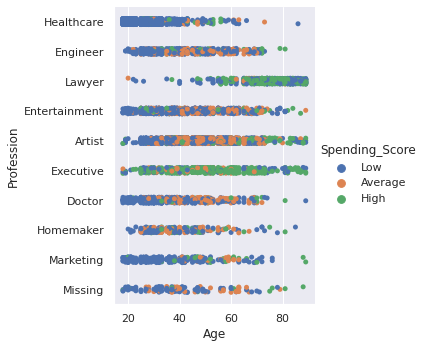

In [98]:
# Viz 1 - Catplot
sns.catplot(data=df, x='Age', y='Profession', hue='Spending_Score')

I believe this is a great visualization of the breakdown of this customer base. From this graph, generally, we can see that spending scores tend to be lower amoung younger customers. Conversely, we see that those with 'average' spending scores tend to be those of age 40 and above. Finally, we can see that those who are considered 'high' in terms of spending score are densely populated among professions like 'Executive' and 'Lawyer.'

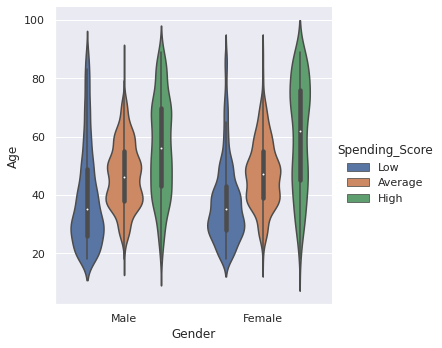

In [113]:
# Viz 2 - Violin PLot
sns.catplot(x="Gender", y="Age", hue="Spending_Score", kind="violin", data=df)

This is another great visual representation of the breakdown of spending scores across age and gender. From this graph, we can further see that both young males and females will generally be in the 'Low' spending scores. It also shows that the 'Avergage' spending scores are located among both men and women around 30 years old. It does, however, give us a better representation of those with 'High' spending scores. Although the mean age for thsi spending class is in the high 50's for men and low 60's for women, there are still a large number in this spending class at 40 and under. 